In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

# ED

In [28]:
df = pd.read_pickle('./../../data/interim/D3_dailyTS/EDdaily_occupancy_class15.pkl')

In [29]:
df.head()

,EDMeanOcc,flag_target
dt_date,,
2009-04-01,28.458333,0
2009-04-02,36.875000,0
2009-04-03,41.458333,0
2009-04-04,36.541667,0
2009-04-05,41.625000,0


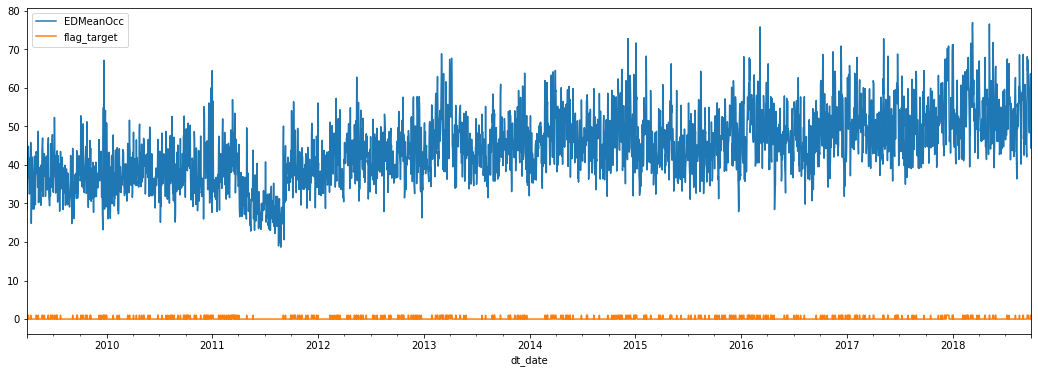

In [30]:
df.plot(figsize=(18,6))

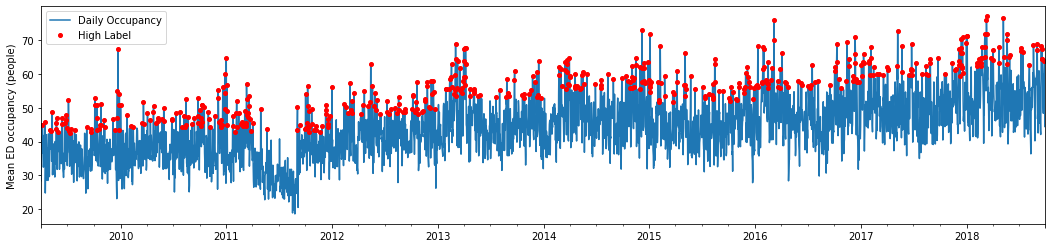

In [31]:
import matplotlib.pyplot as plt 

def plot_occ(df, Occcol_name = 'EDMeanOcc'):
    fig, ax = plt.subplots()
    df[Occcol_name].plot(ax=ax,figsize=(18,4))
    df[df.flag_target == 1][Occcol_name].plot(ax=ax,style='.r',ms=8)
    ax.set_ylabel('Mean ED occupancy (people)')
    ax.set_xlabel('')
    ax.legend(['Daily Occupancy','High Label'],frameon=True,loc='upper left')
    return

plot_occ(df)


In [32]:
start = pd.datetime(2011,1,1)
end = pd.datetime(2012,1,1)
dff = df[(df.index > start) & (df.index < end)]

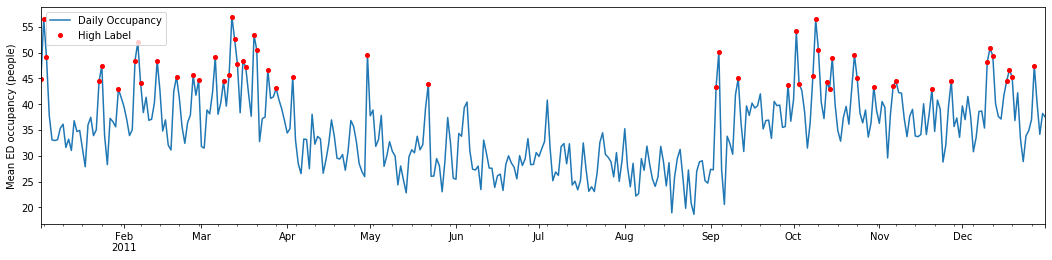

In [33]:
plot_occ(dff)

Look like the discontinuity ends in Sep 2011. Should consider limiting our data to start here.

This would give 7 years of data:
* 2 always in training.
* 4 windows for CV.
* 1 year (+ 1 month) testing.

We should also consider that we need to re-asses the classified points as these were done based on the year that included this discontinuity.

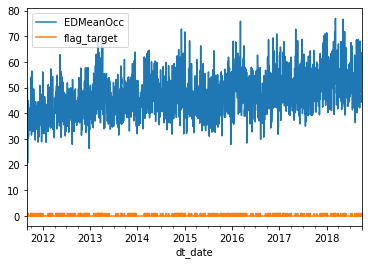

In [38]:
df_clipped = df[df.index >= pd.datetime(2011,9,1)]
df_clipped.plot()

In [34]:
df.tail()

,EDMeanOcc,flag_target
dt_date,,
2018-09-26,60.041667,0
2018-09-27,63.666667,1
2018-09-28,56.791667,0
2018-09-29,44.333333,0
2018-09-30,57.000000,0


#### save clipped data out for use in modelling

In [39]:
df_clipped.to_pickle('./../../data/interim/D3_dailyTS/EDdaily_occupancy_class15_clipped.pkl')

In [40]:
df_clipped.head()

,EDMeanOcc,flag_target
dt_date,,
2011-09-01,27.375000,0
2011-09-02,27.291667,0
2011-09-03,43.375000,1
2011-09-04,50.083333,1
2011-09-05,27.291667,0


In [41]:
df_clipped.tail()

,EDMeanOcc,flag_target
dt_date,,
2018-09-26,60.041667,0
2018-09-27,63.666667,1
2018-09-28,56.791667,0
2018-09-29,44.333333,0
2018-09-30,57.000000,0
